# Decision Tree Practise 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Iris dataset
iris = load_iris()

In [2]:
# Separate features (X) and target (y)
X = iris.data
y = iris.target

In [3]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

# Initialize Decision Tree classifier with Gini criterion, max depth of 5
# Criterion could also be "entropy"
tree_clf = DecisionTreeClassifier(criterion="gini", 
                                  max_depth=5, random_state=42)

In [4]:
# Train (fit) the Decision Tree model
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [5]:
# Make predictions on the test set
y_pred = tree_clf.predict(X_test)

In [6]:
# Calculate accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(acc)  # Print the accuracy score

1.0


In [7]:
# Generate confusion matrix to evaluate classification performance
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)  # Print the confusion matrix

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


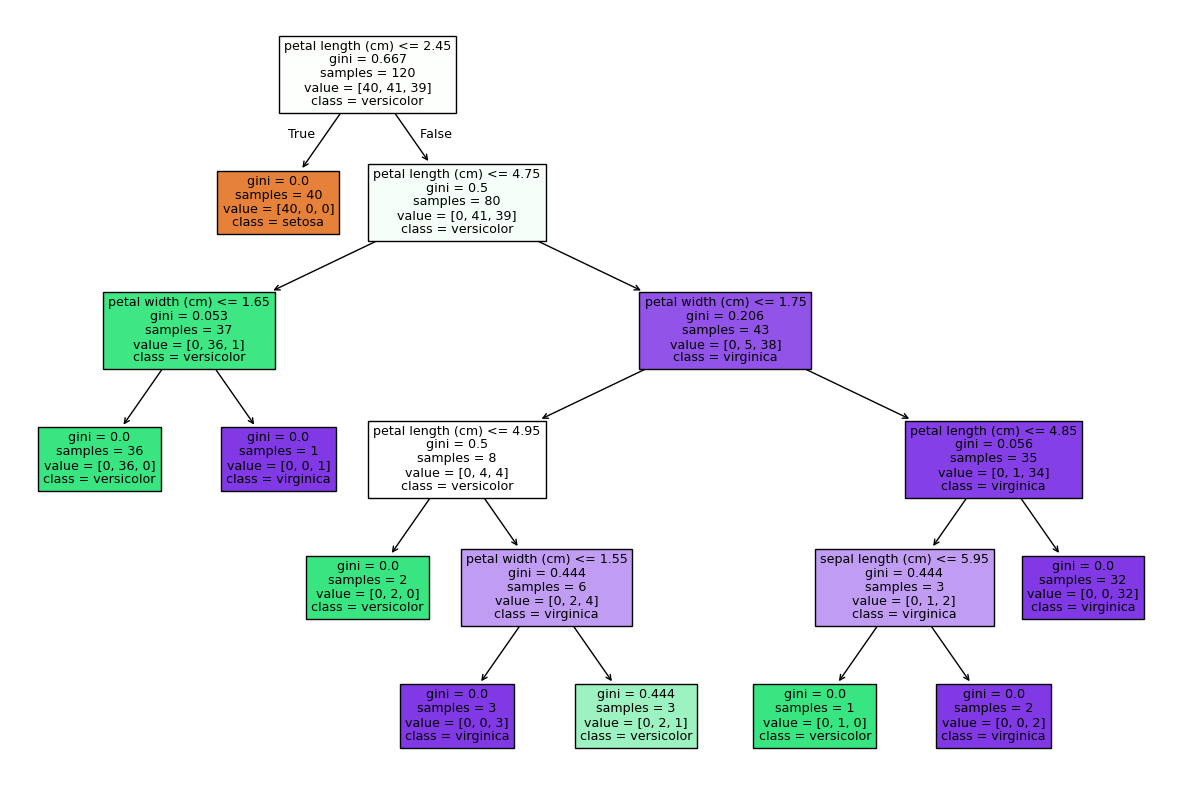

In [8]:
# Plot and visualize the decision tree
plt.figure(figsize=(15, 10))  # Set the size of the plot
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, 
          class_names=iris.target_names)  # Plot the tree
plt.show()  # Display the plot

In [9]:
# Extract feature importances from the trained Decision Tree
feature_importances = tree_clf.feature_importances_
feature_names = iris.feature_names

In [10]:
# Sort features by importance in descending order
fin = sorted(zip(feature_importances, feature_names), reverse=True)

In [11]:
# Print each feature's importance value
for imp, name in fin:
    print(f"{name}: {imp}")  
# Display feature name and its corresponding importance


petal length (cm): 0.9045522597319637
petal width (cm): 0.07849499604256478
sepal length (cm): 0.016952744225471498
sepal width (cm): 0.0


# Support Vector Practise

In [24]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

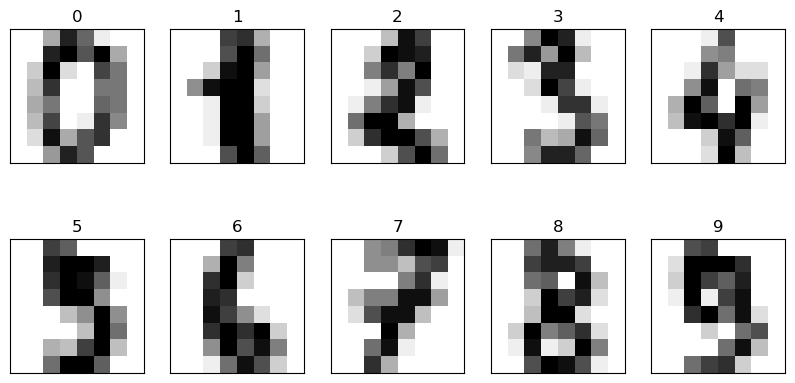

In [60]:
# Create a figure to display sample images from the dataset
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={"xticks": [], "yticks": []})
# Plot the first 10 images with their corresponding labels
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.set_title(digits.target[i])
plt.show()

In [28]:
# Prepare the feature matrix (X) and target vector (y)
X = digits.data
y = digits.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [29]:
# Initialize and train an SVM classifier with a linear kernel
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [30]:
# Predict labels for the test set
y_pred = svm_clf.predict(X_test)

# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# Naive Bayes Practise

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()

In [32]:
# Prepare the feature matrix (X) and target vector (y)
X = iris.data
y = iris.target

In [33]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)


In [34]:
# Initialize and train a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = nb_clf.predict(X_test)

In [35]:
# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Classification Model Comparison

In [36]:
from sklearn.datasets import make_classification, make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np

# Generate classification dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, random_state=42)
X += 1.2 * np.random.uniform(size=X.shape)  # Add some noise
Xy = (X, y)

In [37]:
# Other datasets (moons, circles)
datasets = [
    Xy,
    make_moons(noise=0.2, random_state=42),
    make_circles(noise=0.1, factor=0.3, random_state=42)]

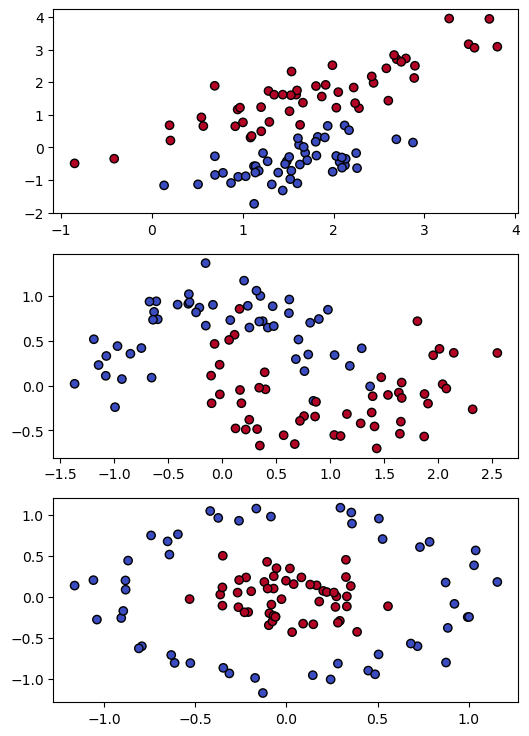

In [38]:
# Create figure for the datasets
fig = plt.figure(figsize=(6, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    ax = plt.subplot(len(datasets), 1, i)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="black")
    i += 1

plt.show()

In [39]:
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [40]:
# Generate datasets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, random_state=42)
X += 1.2 * np.random.uniform(size=X.shape)
Xy = (X, y)

In [41]:
datasets = [
    Xy,
    make_moons(noise=0.2, random_state=42),
    make_circles(noise=0.35, factor=0.3, random_state=42)]

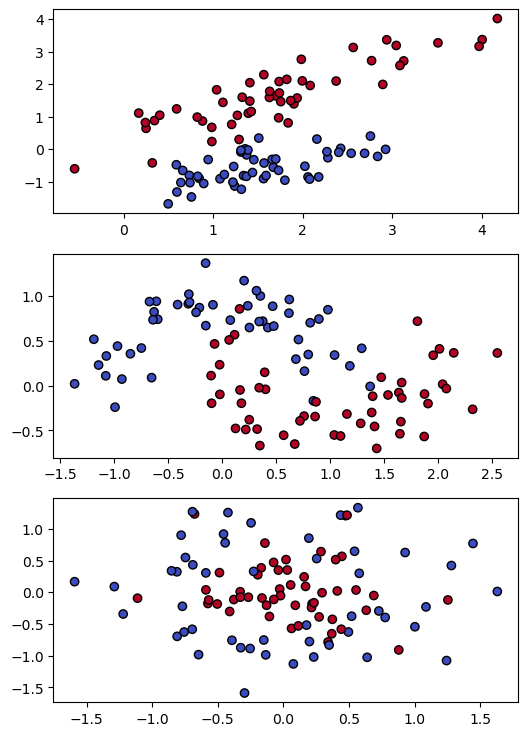

In [42]:
# Plot the datasets
fig = plt.figure(figsize=(6, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    ax = plt.subplot(len(datasets), 1, i)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="black")
    i += 1

plt.show()

In [43]:
# Classifier names and models to test
names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", "Random Forest", 
         "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()]

TypeError: 'NoneType' object is not subscriptable

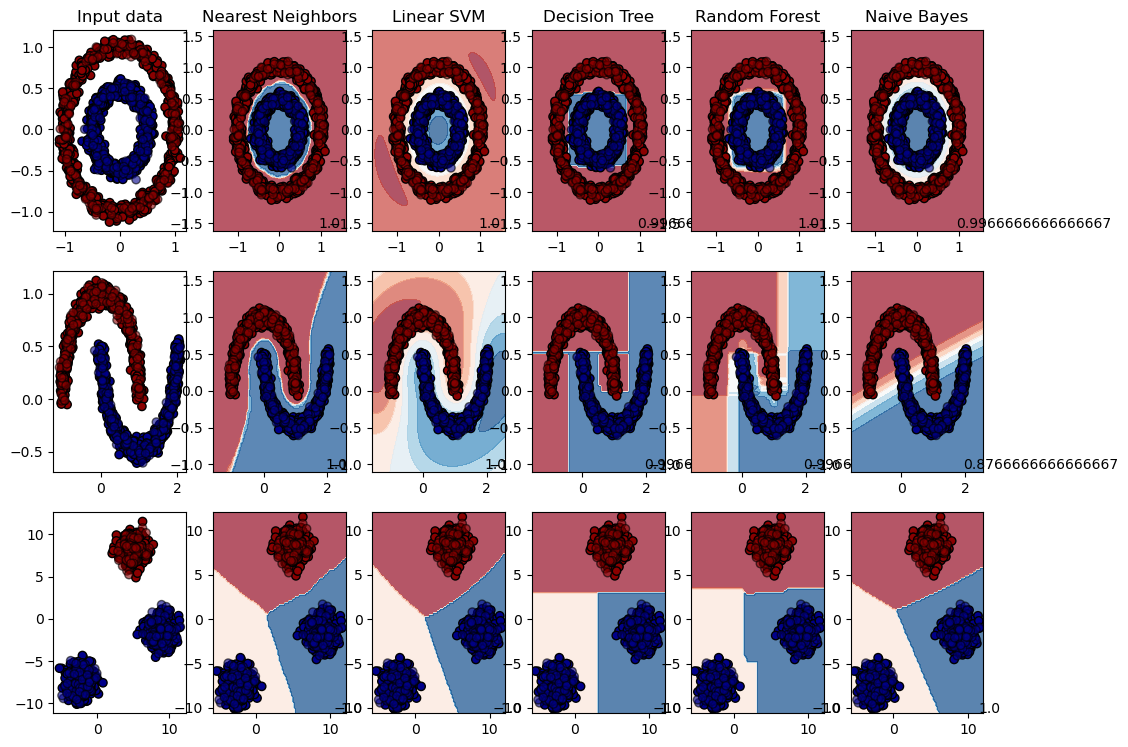

In [59]:
# Plot decision boundaries for each dataset and classifier
fig = plt.figure(figsize=(12, 12))
k = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=42)
    cm_bright = ListedColormap(["darkred", "darkblue"]) 
    ax = plt.subplot(len(datasets), len(classifiers) + 1, k)
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, 
               edgecolors="black")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, 
               edgecolors="black", alpha=0.6)
    k += 1
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, k)
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=plt.cm.RdBu, 
                                               alpha=0.7, ax=ax, eps=0.5)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, 
                   edgecolors="black")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, 
                   edgecolors="black", alpha=0.6)
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            X[:, 0].max() - 0.15,
            X[:, 1].min() - 0.45,
            str(score))
        k += 1

# Clustering Pracise

In [51]:
from sklearn import datasets, cluster
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Generate synthetic datasets
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, 
                                      noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples)
no_structure = (np.random.rand(n_samples, 2), None)

In [53]:
# Names of clustering algorithms to test
clustering_names = ["MiniBatchKMeans", "SpectralClustering", "Ward",
                    "AgglomerativeClustering", "DBSCAN", "Birch"]

# Colors for plotting
colors = np.array(["b", "g", "r", "c", "m", "y"])

In [54]:
# List of datasets to apply clustering algorithms
datasets = [noisy_circles, noisy_moons, blobs, no_structure]

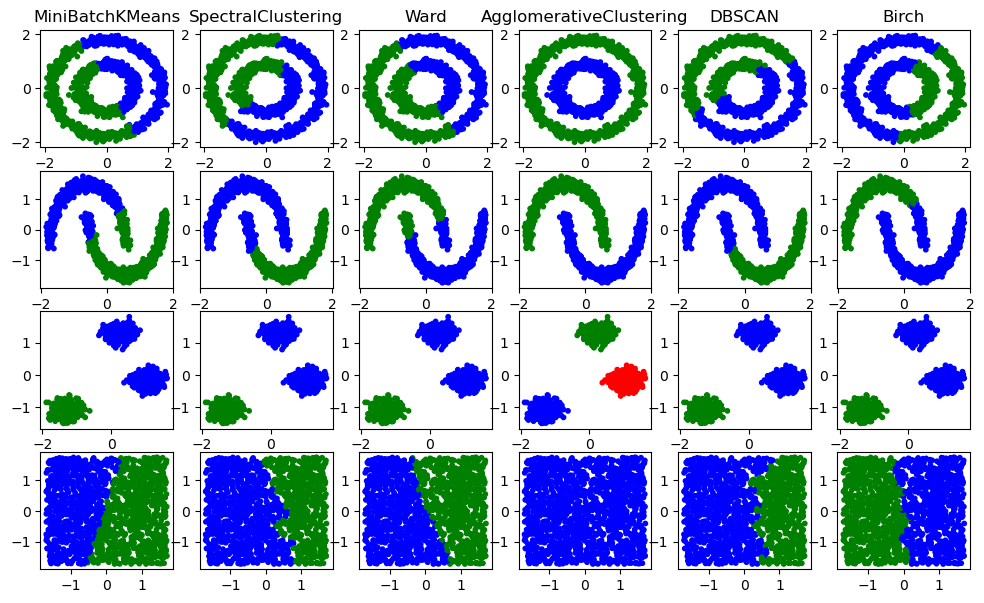

In [55]:
# Create a figure for plotting
plt.figure(figsize=(12, 7))
i = 1
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)  # Standardize the dataset

    # Initialize clustering algorithms
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage="ward")
    spectral = cluster.SpectralClustering(n_clusters=2)
    dbscan = cluster.DBSCAN(eps=0.2)
    average_linkage = cluster.AgglomerativeClustering(n_clusters=2, 
                                                      linkage="average")
    birch = cluster.Birch(n_clusters=2)

    # List of algorithms to apply
    clustering_algorithms = [two_means, ward, spectral, dbscan, average_linkage, 
                             birch]
    for name, algo in zip(clustering_names, clustering_algorithms):

        # Fit the clustering algorithm to the data
        algo.fit(X)
        # Predict cluster labels
        if hasattr(algo, "labels_"):
            y_pred = algo.labels_.astype(int)
        else:
            y_pred = algo.predict(X)

        # Plot the results
        plt.subplot(len(datasets), len(clustering_algorithms), i)
        if i_dataset == 0:
            plt.title(name)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
        i += 1
plt.show()


Text(0.5, 1.0, 'DBSCAN Results')

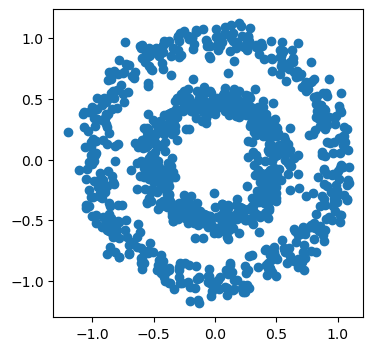

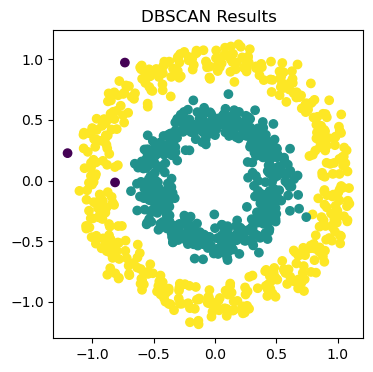

In [61]:
from sklearn.datasets import make_circles
from sklearn. cluster import DBSCAN
import matplotlib.pyplot as plt
X, _= make_circles(n_samples=1000, factor = 0.5, noise = 0.08, random_state=42)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[ :, 1])

dbscan = DBSCAN(eps = 0.15, min_samples = 15)
cluster_labels = dbscan.fit_predict(X) 

plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[ :, 1], c = cluster_labels, cmap = "viridis")
plt.title("DBSCAN Results")